In [1]:
!conda install -y numpy
!conda install -y matplotlib
!pip3 install torchvision

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB
    blas-1.0                   |              mkl           6 KB
    ca-certificates-2021.7.5   |       h06a4308_1         119 KB
    certifi-2021.5.30          |   py37h06a4308_0         141 KB
    conda-4.10.3               |   py37h06a4308_0         3.1 MB
    conda-package-handling-1.7.3|   py37h27cfd23_1         962 KB
    intel-openmp-2021.3.0      |    h06a4308_3350         2.0 MB
    mkl-2021.3.0               |     h06a4308_520       217.4 MB
    mkl-service-2.4.0          |   py37h7f8727e_0          59 KB
    mkl_fft-1.3.0              |   py37h42c9631_2         188 KB
    mkl_random-1.2.2           |   py37h51133e4_0         332 KB
    numpy-1.20.3  

In [22]:
import torch.nn as nn
import torchvision
import torch
from torchvision import transforms
import torchvision.models as models
import matplotlib.pyplot as plt

batchsz = 32
lr = 1e-3
epochs = 10
#device = torch.device('cuda')
torch.manual_seed(1234)   #为了方便以后能复现同样结果
#viz = visdom.Visdom()

resnet = models.resnet18(pretrained=True)
#resnet = nn.Sequential(*list(resnet.children())[:-1],  # [b, 512, 1, 1]
#                          Flatten(),  # [b, 512, 1, 1] => [b, 512]
#                          nn.Linear(512, 5)
#                          )
resnet.fc = nn.Linear(512, 3)
#resnet = ResNet18(2)
print(resnet)

train_data_path = "./3classes/train/"
eval_data_path = "./3classes/validation/"

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [23]:
import numpy as np
from torchvision import transforms

transforms = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [16]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=transforms)
eval_data = torchvision.datasets.ImageFolder(root=eval_data_path, transform=transforms)


In [40]:
EPOCH = 20              # train the training data n times, to save time, we just train 1 epoch
LR = 0.001 
batch_size = 4
train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
eval_loader=torch.utils.data.DataLoader(eval_data,batch_size=batch_size, shuffle=False)

In [41]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)


cuda


In [42]:
#!pip3 install tensorboard

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

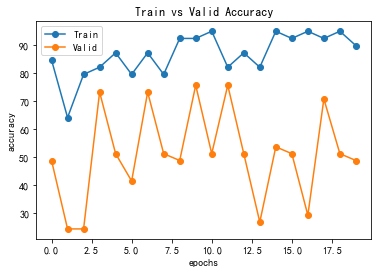

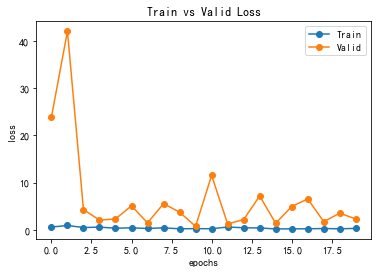

In [43]:


cnn = resnet
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

def fit(model, train_loader, optimizer, loss_func):
    print('Training')
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    total = 0
    
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        optimizer.zero_grad()           # clear gradients for this training step
        b_x, b_y = b_x.to(device), b_y.to(device)
        model = model.to(device)
        output = model(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        #train_running_loss += loss.item()
        _, predicted = output.max(1)
        total += b_y.size(0)
        train_running_correct += predicted.eq(b_y).sum().item()
        
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        
        train_running_loss += loss.item()
     
    train_loss = train_running_loss / len(train_loader)
    train_accuracy = 100. * train_running_correct / total
    return train_loss, train_accuracy

def evalidate(model, eval_loader, optimizer, loss_func):
    print('Testing')
    model.eval()
    eval_running_loss = 0.0
    eval_running_correct = 0
    total = 0
    
    #不需要计算梯度，所以加上不求导，验证集一定要加上这几句话
    with torch.no_grad():
        for step, (b_x, b_y) in enumerate(eval_loader):   # gives batch data, normalize x when iterate train_loader
            b_x, b_y = b_x.to(device), b_y.to(device)
            model = model.to(device)
            output = model(b_x)               # cnn output
            loss = loss_func(output, b_y)   # cross entropy loss
            eval_running_loss += loss.item()
            
            _, predicted = output.max(1)
            total += b_y.size(0)
            eval_running_correct += predicted.eq(b_y).sum().item()

        eval_loss = eval_running_loss / len(eval_loader)
        eval_accuracy = 100. * eval_running_correct / total
        return eval_loss, eval_accuracy
    
train_loss, train_accuracy = [], []
eval_loss, eval_accuracy = [], []

# training and testing
for epoch in range(EPOCH):
    #print(f"Epoch {epoch+1} of {EPOCH}")
    train_epoch_loss, train_epoch_accuracy = fit(
        cnn, train_loader, optimizer, loss_func
    )
    
    eval_epoch_loss, eval_epoch_accuracy = evalidate(
        cnn, eval_loader, optimizer, loss_func
    )


    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    
    eval_loss.append(eval_epoch_loss)
    eval_accuracy.append(eval_epoch_accuracy)
    
    
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_epoch_loss,train_epoch_accuracy))
    print('Eval Loss: %.3f | Accuracy: %.3f'%(eval_epoch_loss,eval_epoch_accuracy))


plt.plot(train_accuracy,'-o')
plt.plot(eval_accuracy,'-o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Valid'])
plt.title('Train vs Valid Accuracy')
plt.show()

plt.plot(train_loss,'-o')
plt.plot(eval_loss,'-o')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Valid'])
plt.title('Train vs Valid Loss')
plt.show()

In [ ]:
#cnn.eval()

from PIL import Image

img = Image.open('./test/cat/1.jpg')
img = transforms(img)
img = img.unsqueeze(0)

prediction = cnn(img)
prediction = prediction.argmax()
print(prediction)

In [8]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
#training the model
epochs = 10

running_loss = 0.0
running_corrects = 0

for epoch in range(epochs):
    print('Epoch {}/{}'.format(epoch + 1, epochs))
    
    for batch in train_data_loader:
        optimizer.zero_grad()
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        output = model(inputs)
        cross_entropy_loss = nn.CrossEntropyLoss()
        loss = cross_entropy_loss(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    print('Traning Loss: {:.4f}'.format(running_loss/batch))
        

Epoch 1/10


TypeError: unsupported operand type(s) for /: 'float' and 'list'

In [22]:
print(model)

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [38]:
from PIL import Image

labels = ['dog','cat']
img = Image.open('./test/10.jpg')
img = transforms(img)
img = img.unsqueeze(0)
img = img.to(device)
prediction = model(img)
prediction = prediction.argmax()

print(labels[prediction])

dog
